**Muhammed Gülsoy**


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [120]:
df=pd.read_csv("/dataset/diamonds.csv")

Carat is numerical value.I can observe distrubution of the carat for this dataset. I will use scatter plot for it.<br>
Cut is an important feature for diamonds. I will analyse correlation between cut and others.<br>
There are seven type of colors. I want to count them separately.
I will check distrubituon of price    

In [121]:
df.head(10)

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0           1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1           2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2           3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3           4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4           5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
5           6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
6           7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   
7           8   0.26  Very Good     H     SI1   61.9   55.0    337  4.07   
8           9   0.22       Fair     E     VS2   65.1   61.0    337  3.87   
9          10   0.23  Very Good     H     VS1   59.4   61.0    338  4.00   

      y     z  
0  3.98  2.43  
1  3.84  2.31  
2  4.07  2.31  
3  4.23  2.63  
4  4.35  2.75  
5  3.96  2.48  
6  3.98  2.47  
7  4.11  2.53  
8  3.78  2.49  
9  4.05  2.39

#general analysis

In [122]:
len(df)

53940

In [123]:
df.describe()

Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

there is no null values in dataset

In [124]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

positive corr<br>
carat---price--x--y--z

negative corr <br>
cut-table


In [125]:
df.corr()

<ipython-input-125-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Unnamed: 0     carat     depth     table     price         x  \
Unnamed: 0    1.000000 -0.377983 -0.034800 -0.100830 -0.306873 -0.405440   
carat        -0.377983  1.000000  0.028224  0.181618  0.921591  0.975094   
depth        -0.034800  0.028224  1.000000 -0.295779 -0.010647 -0.025289   
table        -0.100830  0.181618 -0.295779  1.000000  0.127134  0.195344   
price        -0.306873  0.921591 -0.010647  0.127134  1.000000  0.884435   
x            -0.405440  0.975094 -0.025289  0.195344  0.884435  1.000000   
y            -0.395843  0.951722 -0.029341  0.183760  0.865421  0.974701   
z            -0.399208  0.953387  0.094924  0.150929  0.861249  0.970772   

                   y         z  
Unnamed: 0 -0.395843 -0.399208  
carat       0.951722  0.953387  
depth      -0.029341  0.094924  
table       0.183760  0.150929  
price       0.865421  0.861249  
x           0.974701  0.970772  
y           1.000000  0.952006  
z           0.952006  1.000000

#CARAT

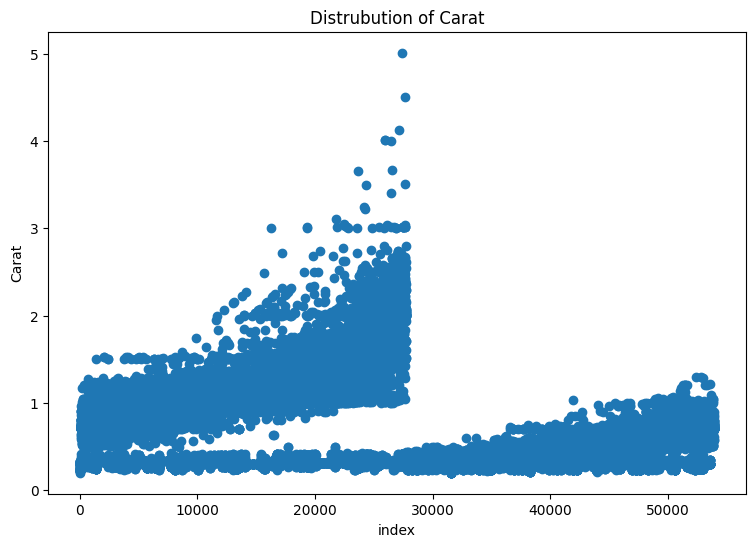

In [126]:
plt.figure(figsize=(9,6))
plt.scatter(x=df["Unnamed: 0"],y=df["carat"])
plt.ylabel("Carat")
plt.xlabel("index")
plt.title("Distrubution of Carat")
plt.show()

In [127]:
df.corr()["carat"].sort_values()

<ipython-input-127-332cbae27c63>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["carat"].sort_values()


Unnamed: 0   -0.377983
depth         0.028224
table         0.181618
price         0.921591
y             0.951722
z             0.953387
x             0.975094
carat         1.000000
Name: carat, dtype: float64

#CUT

In [128]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [129]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

Text(0.5, 1.0, 'Distribution of Categories')

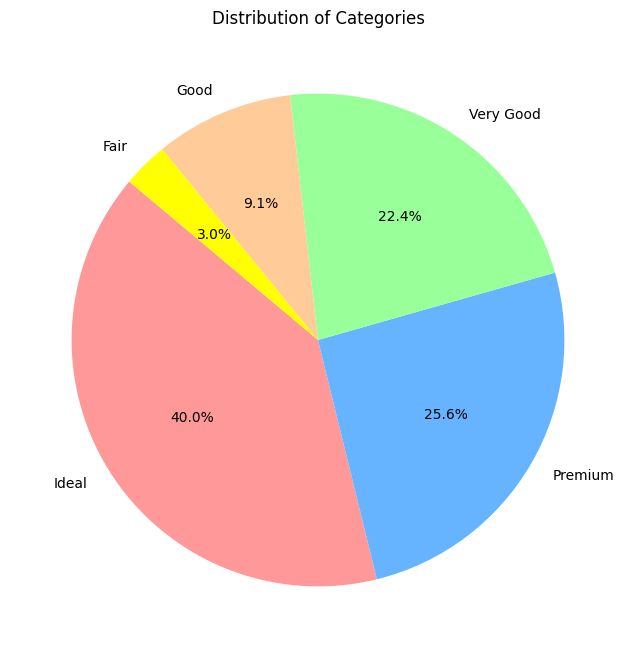

In [130]:
percentage=(df["cut"].value_counts().values)*100/53940
labels = df["cut"].value_counts().index

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','yellow'])
plt.title('Distribution of Categories')

cut is categorical data that needs to be ordered. I want to use replace function to achieve this purpose

In [131]:
df["cut"]=df["cut"].replace({"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5})

In [132]:
df.head()

Unnamed: 0  carat  cut color clarity  depth  table  price     x     y     z
0           1   0.23    5     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1           2   0.21    4     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2           3   0.23    2     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3           4   0.29    4     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4           5   0.31    2     J     SI2   63.3   58.0    335  4.34  4.35  2.75

#color

In [133]:
x=df["color"].value_counts().index
y=df["color"].value_counts().values


<Axes: >

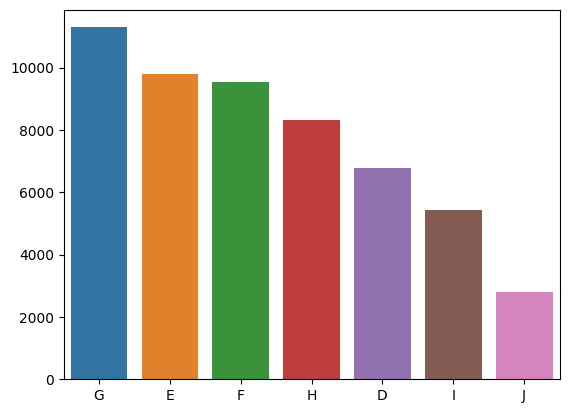

In [134]:
sbn.barplot(x=x,y=y)

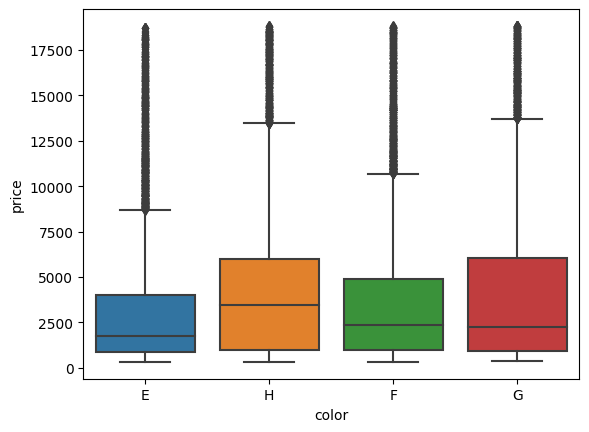

In [135]:
df2=df[(df["color"]=='G') |
       (df["color"]=='E' )|
       (df["color"]=='F') |
       (df["color"]=='H')]
ax=sbn.boxplot(x="color",y="price",data=df2)

price

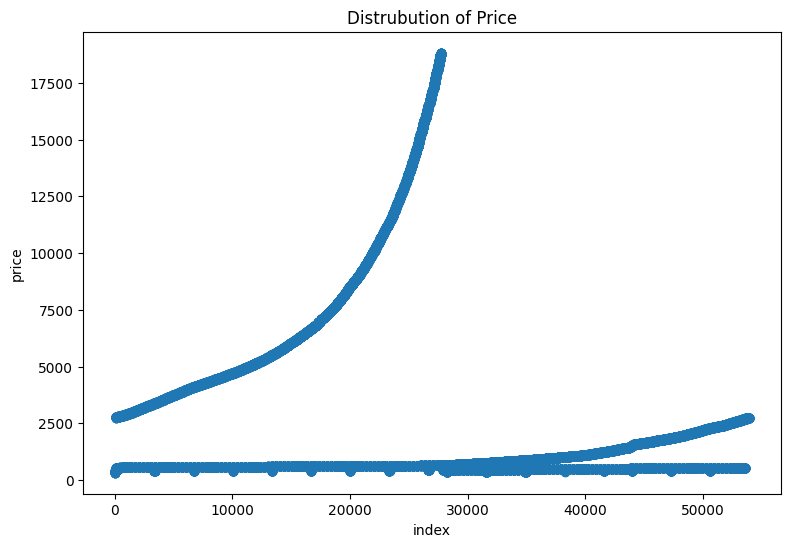

In [136]:
plt.figure(figsize=(9,6))
plt.scatter(x=df["Unnamed: 0"],y=df["price"])
plt.ylabel("price")
plt.xlabel("index")
plt.title("Distrubution of Price")
plt.show()

#Question 1<br>
>Find mean, median and mode of attribute ‘price’ and show them on a graph with lines. Then find if the graph is normally distributed, or skewed (if it is skewed, please point out if it is negatively or positively skewed

In [137]:
median=df["price"].median()
mode=float(df["price"].mode())
mean=df["price"].mean()
print(mean,median,mode)

3932.799721913237 2401.0 605.0


>It is not normal distrubution.mean>median>mode so it is positive skewed.

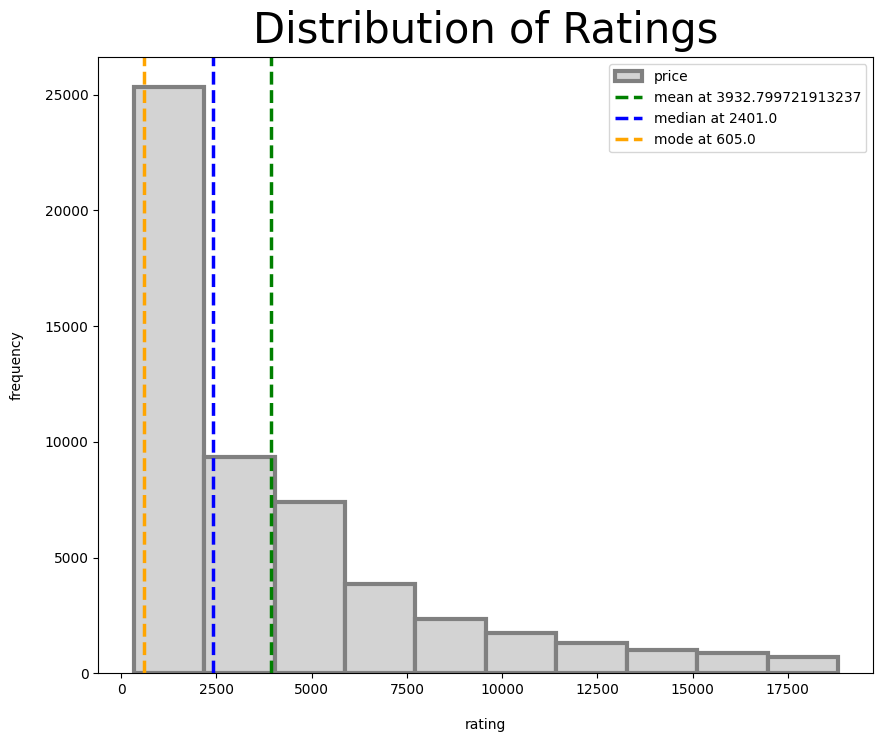

In [138]:
df["price"].plot(kind="hist",figsize=(10,8),linewidth=3,color="lightgray",edgecolor="gray")
plt.xlabel("rating",labelpad=15)
plt.ylabel("frequency",labelpad=15)
plt.title("Distribution of Ratings",y=1.01,fontsize=30)
measurements=[mean,median,mode]
names=["mean","median","mode"]
colors=['green','blue','orange']
for measure,name,color in zip(measurements,names,colors):
  plt.axvline(x=measure,linestyle="--",linewidth=2.5,label="{0} at {1}".format(name,measure),c=color)

plt.legend();

#QUESTION 2
>- Perform the sampling methods we seen so far on the ‘depth’ attribute and comment on which sampling method is better for diamonds dataset


In [139]:
len(df)

53940

In [140]:
df["depth"].mean()

61.749404894327036

**simple random sampling**

In [141]:
from random import sample

ratings_to_list=list(df["depth"])
sample_list=sample(ratings_to_list,400)
print(sample_list[0:10])


[62.5, 62.5, 59.9, 60.9, 59.7, 61.3, 61.9, 64.2, 62.5, 63.1]


In [142]:
def mean_function_list(list):
  sum=0
  for i in range(len(list)):
    sum+=list[i]
  mean=sum/len(list)
  print(mean)
mean_function_list(sample_list)

61.723999999999954


**systematic sampling**

In [143]:
def systematic_sampling(df,step):
  indexes=np.arange(0,len(df),step=step)
  systematic_sample=df.iloc[indexes]
  print(systematic_sample["depth"].mean())

systematic_sampling(df,5)

61.74356692621431


**cluster sampling**

In [144]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [145]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [146]:
len(df)

53940

In [147]:
def cluster_sampling(df,num_of_clus):
  try:
    df["cluster_id"]=np.repeat([range(1,num_of_clus+1)],len(df) // num_of_clus)
    indexes=[]
    for i in range(0,len(df)):
      if (df["cluster_id"].iloc[i]%2==0):
        indexes.append(i)
    cluster_sample=df.iloc[indexes]
    return cluster_sample
  except:
    print("population cannot be divided into clusters of equal size!")


cluster_sample=cluster_sampling(df,5)

In [148]:
cluster_sample

Unnamed: 0  carat  cut color clarity  depth  table  price     x     y  \
10788       10789   1.26    5     J     SI2   62.8   54.0   4860  6.91  6.89   
10789       10790   1.00    1     H     VS2   64.8   62.0   4861  6.22  6.13   
10790       10791   1.07    3     G     SI1   60.5   62.0   4861  6.60  6.69   
10791       10792   1.07    3     D     SI2   62.6   61.0   4861  6.42  6.49   
10792       10793   1.07    2     G     SI1   63.1   59.0   4861  6.45  6.49   
...           ...    ...  ...   ...     ...    ...    ...    ...   ...   ...   
43147       43148   0.52    3     E     SI1   62.7   57.0   1389  5.10  5.14   
43148       43149   0.33    5     F      IF   62.1   56.0   1389  4.41  4.44   
43149       43150   0.56    1     E     SI2   64.5   61.0   1389  5.18  5.14   
43150       43151   0.58    5     H     SI1   61.9   59.0   1389  5.33  5.36   
43151       43152   0.52    5     G     SI1   61.3   55.0   1389  5.20  5.24   

          z  cluster_id  
10788  4.33           2  
10789  4.00           2  
10790  4.02           2  
10791  4.04           2  
10792  4.08           2  
...     ...         ...  
43147  3.21           4  
43148  2.75           4  
43149  3.33           4  
43150  3.31           4  
43151  3.20           4  

[21576 rows x 12 columns]

In [149]:
print(cluster_sample["depth"].mean())

61.729611605487584


#RESULT
Scope of this project<br>---------------------- <br>1.systematic<br> 2.simple random<br> 3.cluster <br> <br>--------------------<br>
df 61.7494 <br> <br>
simple random sampling(not stable):  61.7514 <br> <br>
systematic sampling      61.7435 <br> <br>
cluster sampling         61.7296